In [3]:
import numpy as np
import pandas as pd


In [4]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


In [5]:
# Load necessary library
import os
import pandas as pd
import numpy as np
import math
import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import matplotlib.ticker as mtick
import seaborn as sns
import folium
import branca.colormap as cm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')
%matplotlib inline

plt.rcParams["figure.figsize"] = (15,8)

In [6]:
# Load and preview data 
accident = pd.read_csv("US_Accidents_June20.csv")
accident.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [7]:
# Summary Statistics
accident.describe()

,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.478818e+06,3.513740e+06,3.513740e+06,3.513740e+06,1.034922e+06,1.034922e+06,3.513740e+06,1.250786e+06,3.448004e+06,1.645484e+06,3.444049e+06,3.457856e+06,3.437879e+06,3.059127e+06,1.487859e+06
mean,2.080226e+02,2.339935e+00,3.654208e+01,-9.579208e+01,3.755791e+01,-1.004574e+02,2.816462e-01,5.975823e+03,6.193496e+01,5.355749e+01,6.511372e+01,2.974452e+01,9.122668e+00,8.218940e+00,1.598132e-02
std,2.076627e+01,5.522103e-01,4.883511e+00,1.736894e+01,4.861103e+00,1.852878e+01,1.550166e+00,1.496662e+04,1.862108e+01,2.377308e+01,2.275582e+01,8.322425e-01,2.885840e+00,5.262870e+00,1.928187e-01
min,2.000000e+02,1.000000e+00,2.455527e+01,-1.246238e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.010000e+02,2.000000e+00,3.363793e+01,-1.174420e+02,3.399487e+01,-1.183450e+02,0.000000e+00,8.640000e+02,5.000000e+01,3.570000e+01,4.800000e+01,2.973000e+01,1.000000e+01,5.000000e+00,0.000000e+00
50%,2.010000e+02,2.000000e+00,3.591703e+01,-9.102632e+01,3.779787e+01,-9.703673e+01,0.000000e+00,2.798000e+03,6.400000e+01,5.700000e+01,6.700000e+01,2.995000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.010000e+02,3.000000e+00,4.032258e+01,-8.093303e+01,4.105139e+01,-8.210268e+01,1.000000e-02,7.098000e+03,7.590000e+01,7.200000e+01,8.400000e+01,3.009000e+01,1.000000e+01,1.150000e+01,0.000000e+00
max,4.060000e+02,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,3.336300e+02,9.999997e+06,1.706000e+02,1.150000e+02,1.000000e+02,5.774000e+01,1.400000e+02,9.840000e+02,2.500000e+01


In [8]:
# Check each column for nas
accident.isnull().sum()

ID                             0
Source                         0
TMC                      1034922
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  2478818
End_Lng                  2478818
Distance(mi)                   0
Description                    1
Number                   2262954
Street                         0
Side                           0
City                         112
County                         0
State                          0
Zipcode                     1069
Country                        0
Timezone                    3880
Airport_Code                6758
Weather_Timestamp          43325
Temperature(F)             65736
Wind_Chill(F)            1868256
Humidity(%)                69691
Pressure(in)               55884
Visibility(mi)             75861
Wind_Direction             58877
Wind_Speed(mph)           454613
Precipitat

In [9]:
# Exclude unnecessary columns
exclude = ["TMC","End_Lat","End_Lng","Description","Number","Street","Timezone",
           "Airport_Code","Weather_Timestamp","Civil_Twilight","Nautical_Twilight","Astronomical_Twilight"]
accident_clean = accident.drop(exclude,axis=1)
accident_clean.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Side,City,...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
0,A-1,MapQuest,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.01,R,Dayton,...,False,False,False,False,False,False,False,False,False,Night
1,A-2,MapQuest,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.01,L,Reynoldsburg,...,False,False,False,False,False,False,False,False,False,Night
2,A-3,MapQuest,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,R,Williamsburg,...,False,False,False,False,False,False,False,True,False,Night
3,A-4,MapQuest,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.01,R,Dayton,...,False,False,False,False,False,False,False,False,False,Night
4,A-5,MapQuest,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.01,R,Dayton,...,False,False,False,False,False,False,False,True,False,Day


In [10]:
# Check nas after excluding unnecessary columns
accident_clean.isnull().sum()

ID                         0
Source                     0
Severity                   0
Start_Time                 0
End_Time                   0
Start_Lat                  0
Start_Lng                  0
Distance(mi)               0
Side                       0
City                     112
County                     0
State                      0
Zipcode                 1069
Country                    0
Temperature(F)         65736
Wind_Chill(F)        1868256
Humidity(%)            69691
Pressure(in)           55884
Visibility(mi)         75861
Wind_Direction         58877
Wind_Speed(mph)       454613
Precipitation(in)    2025881
Weather_Condition      76143
Amenity                    0
Bump                       0
Crossing                   0
Give_Way                   0
Junction                   0
No_Exit                    0
Railway                    0
Roundabout                 0
Station                    0
Stop                       0
Traffic_Calming            0
Traffic_Signal

In [11]:
# Adding calculation of time difference of start and end time in minutes
accident_clean.Start_Time = pd.to_datetime(accident_clean.Start_Time)
accident_clean.End_Time = pd.to_datetime(accident_clean.End_Time)
accident_clean["Time_Diff"] = (accident_clean.End_Time - accident_clean.Start_Time).astype('timedelta64[m]')

accident_clean["Start_Date"] = accident_clean["Start_Time"].dt.date
accident_clean["End_Date"] = accident_clean["End_Time"].dt.date
accident_clean["Year"] = accident_clean["Start_Time"].dt.year
accident_clean["Month"] = accident_clean["Start_Time"].dt.month
accident_clean["Day"] = accident_clean["Start_Time"].dt.day
accident_clean["Hour"] = accident_clean["Start_Time"].dt.hour

# Excluding accidents in 2015 and 2021 where there's not enough data
accident_clean = accident_clean[(accident_clean["Year"] > 2015) & (accident_clean["Year"] < 2021)]
group = accident_clean.groupby(["Year"]).agg(Count = ('ID','count'))

# Verify data
accident_clean.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Side,City,...,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Time_Diff,Start_Date,End_Date,Year,Month,Day,Hour
0,A-1,MapQuest,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.01,R,Dayton,...,False,False,Night,314.0,2016-02-08,2016-02-08,2016,2,8,5
1,A-2,MapQuest,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.01,L,Reynoldsburg,...,False,False,Night,30.0,2016-02-08,2016-02-08,2016,2,8,6
2,A-3,MapQuest,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,R,Williamsburg,...,True,False,Night,30.0,2016-02-08,2016-02-08,2016,2,8,6
3,A-4,MapQuest,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.01,R,Dayton,...,False,False,Night,30.0,2016-02-08,2016-02-08,2016,2,8,7
4,A-5,MapQuest,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.01,R,Dayton,...,True,False,Day,30.0,2016-02-08,2016-02-08,2016,2,8,7


In [12]:
# Examine data
accident_clean.groupby(["Year","Severity"]).size().unstack()

Severity,1,2,3,4
Year,,,,
2016,225,269847,126178,14350
2017,282,461976,231081,24151
2018,259,574027,292562,25769
2019,203,687665,237794,28071
2020,28206,379784,111298,20011


<function matplotlib.pyplot.show(close=None, block=None)>

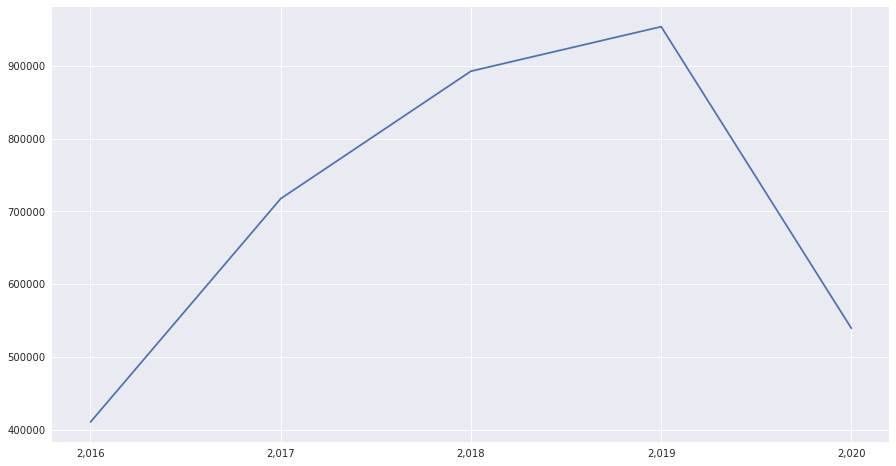

In [13]:
# accident_clean.groupby(["Start_Date","Severity"])["ID"].count()

# Group by year and Group by year and severity
group_year = accident_clean.groupby(["Year"]).agg(Count = ('ID','count'))
group_year_sev = accident_clean.groupby(["Year","Severity"]).size().unstack()

# YoY Total Accident Count
# fig = plt.figure(figsize=(15,8))

# plt.subplot(1, 2, 1)
plt.plot(group_year.index, group_year["Count"])
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.xticks(np.arange(2016, 2021, 1.0))

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

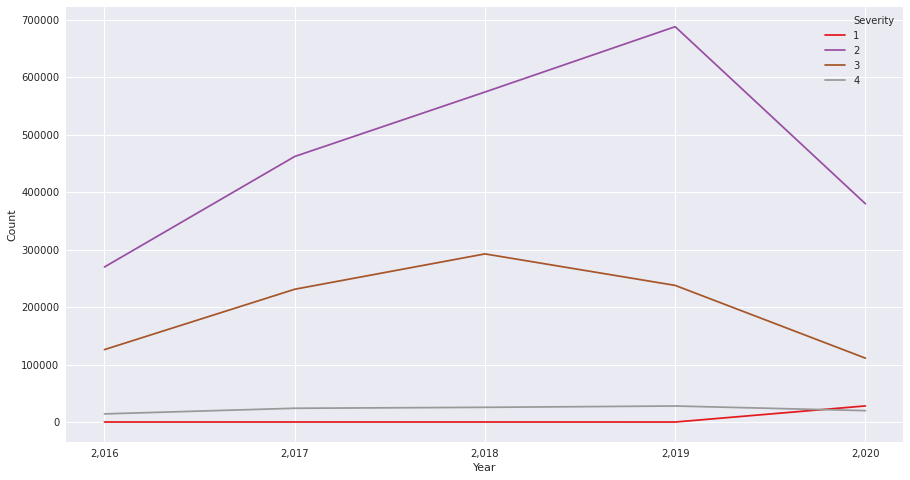

In [14]:
# YoY trend by severity, more in 2, 1 and 4 looks like flat, need to see in a bar plot
# fig = plt.figure(figsize=(15,8))
group_year_sev2 = accident_clean.groupby(["Year","Severity"]).agg(Count = ('ID','count')).reset_index()
sns.lineplot(x='Year',y='Count',hue="Severity",data=group_year_sev2,palette="Set1")
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.xticks(np.arange(2016, 2021, 1.0))
plt.show

<AxesSubplot:xlabel='Year'>

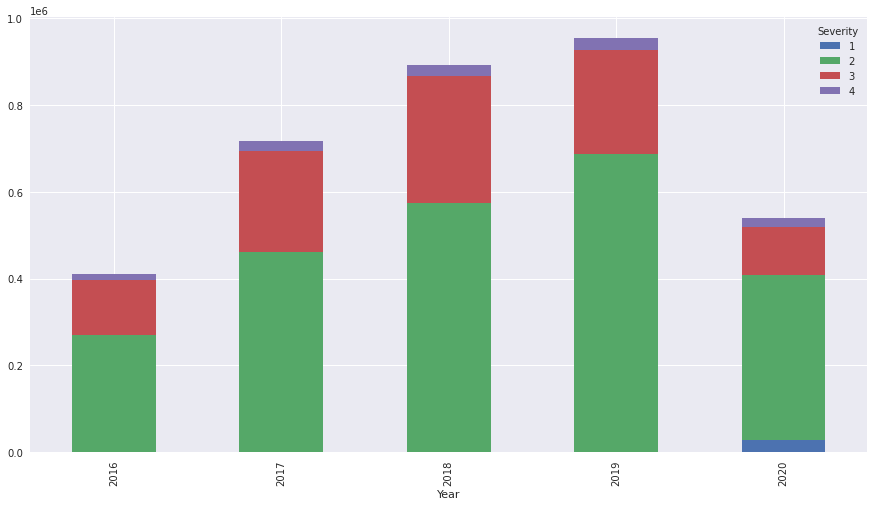

In [15]:
# YoY Severity Count
# group_year_sev = accident_clean.groupby(["Year","Severity"]).agg(Count = ('ID','count'))
# group_year_sev
accident_clean.groupby(["Year","Severity"]).size().unstack().plot(kind='bar',stacked=True)

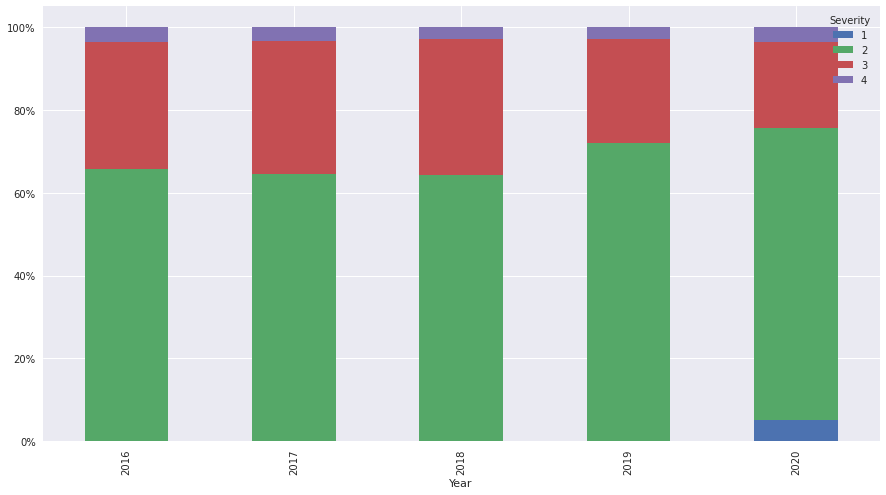

In [16]:
# Makes more sense to show stacked 100%, a different view
accident_clean.groupby(["Year","Severity"]).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(loc = 'upper right',title = 'Severity')
plt.show()

<AxesSubplot:xlabel='Severity', ylabel='Temperature(F)'>

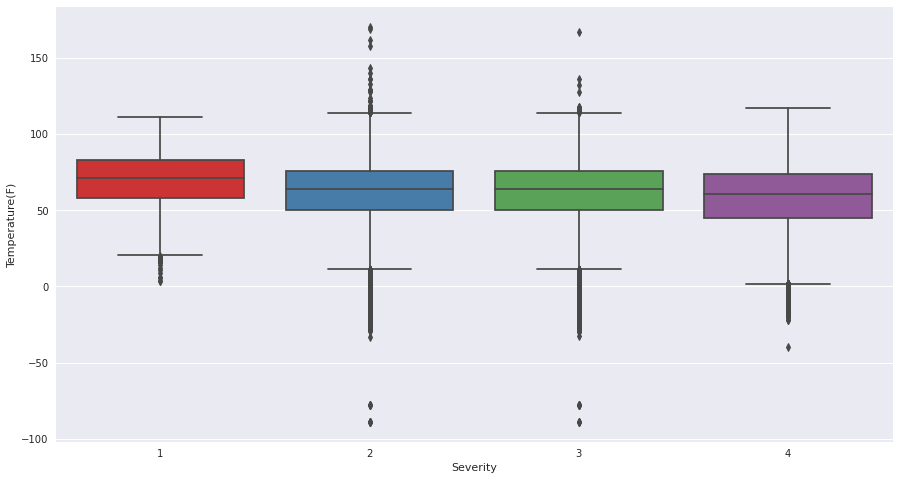

In [17]:
# Boxplot to show if temperature has impact on the severity of the accident, 
# looks like the more severe accident has lower temperature
sns.boxplot(x="Severity", y="Temperature(F)", data=accident_clean, palette="Set1")

<AxesSubplot:xlabel='Severity', ylabel='Humidity(%)'>

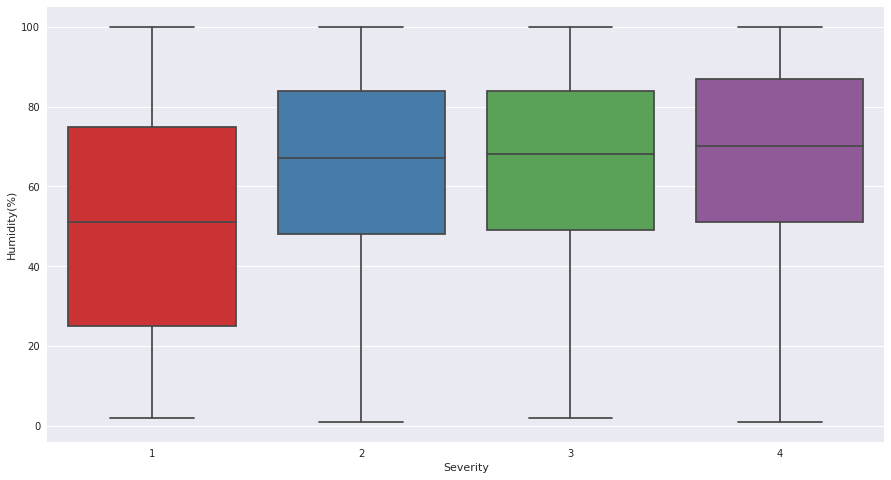

In [18]:
# Boxplot to show if temperature has impact on the severity of the accident, 
# looks like the more severe accident has lower temperature
sns.boxplot(x="Severity", y="Humidity(%)", data=accident_clean, palette="Set1")

<AxesSubplot:xlabel='Severity', ylabel='Wind_Chill(F)'>

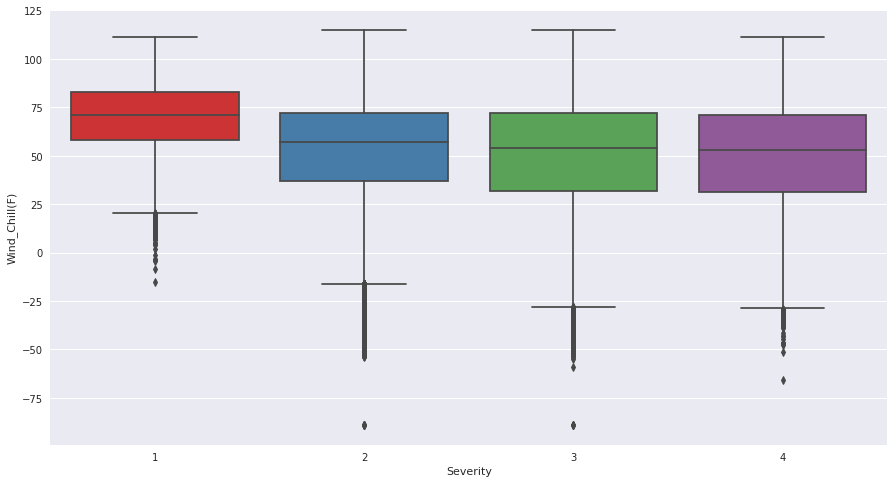

In [19]:
# Examine wind chill and accident severity, lower wind chill cause more severe accidents
sns.boxplot(x="Severity", y="Wind_Chill(F)", data=accident_clean, palette="Set1")

In [20]:
# Count of Severity by Sunrise_Sunset to see if more severe accidents happened at night
pd.crosstab(accident_clean["Severity"], accident_clean["Sunrise_Sunset"], 
            rownames=['Severity'], colnames=['Sunrise_Sunset'])

Sunrise_Sunset,Day,Night
Severity,,
1,24104,5068
2,1785204,588016
3,716108,282792
4,68427,43905


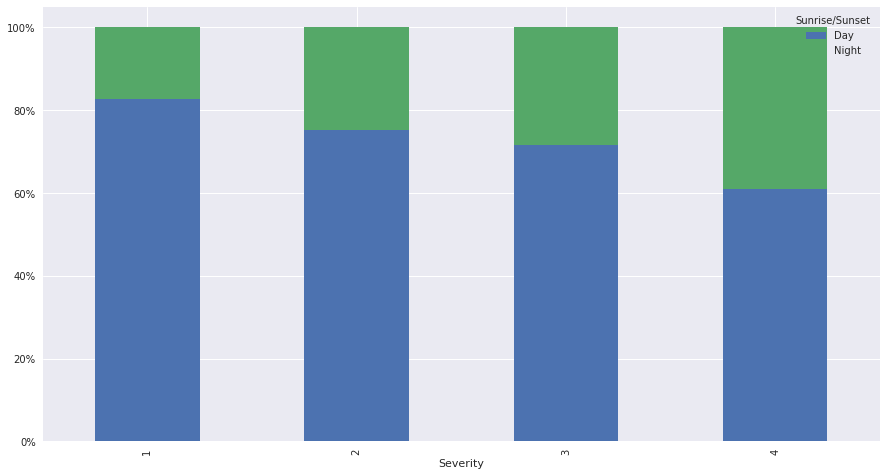

In [21]:
# Severity 1 and two has same % between day and night while 3 and 4 has more accidents % at nights
accident_clean.groupby(["Severity","Sunrise_Sunset"]).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(loc = 'upper right',title = 'Sunrise/Sunset')
plt.show()

In [3]:
# Load necessary library
import os
import pandas as pd
import numpy as np
import math
import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import matplotlib.ticker as mtick
import seaborn as sns
import folium
import branca.colormap as cm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')
%matplotlib inline

plt.rcParams["figure.figsize"] = (15,8)




# Load and preview data 
accident = pd.read_csv("US_Accidents_June20.csv")


# Exclude unnecessary columns
exclude = ["TMC","End_Lat","End_Lng","Description","Number","Street","Timezone",
           "Airport_Code","Weather_Timestamp","Civil_Twilight","Nautical_Twilight","Astronomical_Twilight"]
accident_clean = accident.drop(exclude,axis=1)


# Adding calculation of time difference of start and end time in minutes
accident_clean.Start_Time = pd.to_datetime(accident_clean.Start_Time)
accident_clean.End_Time = pd.to_datetime(accident_clean.End_Time)
accident_clean["Time_Diff"] = (accident_clean.End_Time - accident_clean.Start_Time).astype('timedelta64[m]')

accident_clean["Start_Date"] = accident_clean["Start_Time"].dt.date
accident_clean["End_Date"] = accident_clean["End_Time"].dt.date
accident_clean["Year"] = accident_clean["Start_Time"].dt.year
accident_clean["Month"] = accident_clean["Start_Time"].dt.month
accident_clean["Day"] = accident_clean["Start_Time"].dt.day
accident_clean["Hour"] = accident_clean["Start_Time"].dt.hour

# Excluding accidents in 2015 and 2021 where there's not enough data
accident_clean = accident_clean[(accident_clean["Year"] > 2015) & (accident_clean["Year"] < 2021)]
group = accident_clean.groupby(["Year"]).agg(Count = ('ID','count'))

# Verify data
accident_clean.head()







,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Side,City,...,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Time_Diff,Start_Date,End_Date,Year,Month,Day,Hour
0,A-1,MapQuest,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.01,R,Dayton,...,False,False,Night,314.0,2016-02-08,2016-02-08,2016,2,8,5
1,A-2,MapQuest,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.01,L,Reynoldsburg,...,False,False,Night,30.0,2016-02-08,2016-02-08,2016,2,8,6
2,A-3,MapQuest,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,R,Williamsburg,...,True,False,Night,30.0,2016-02-08,2016-02-08,2016,2,8,6
3,A-4,MapQuest,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.01,R,Dayton,...,False,False,Night,30.0,2016-02-08,2016-02-08,2016,2,8,7
4,A-5,MapQuest,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.01,R,Dayton,...,True,False,Day,30.0,2016-02-08,2016-02-08,2016,2,8,7


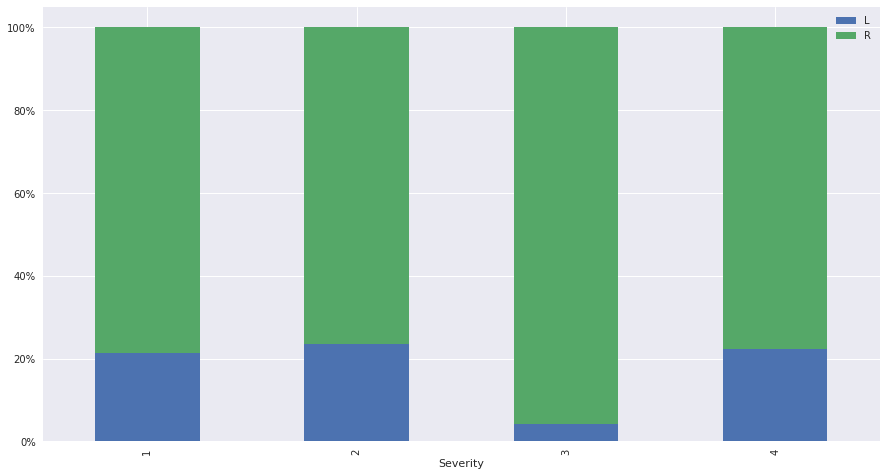

In [3]:
# Most accidents happened on the right side of the road
# Severity 3 has more on right then the left side of the road
accident_clean[accident_clean.Side != " "].groupby(["Severity","Side"]).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.legend(loc = 'upper right')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

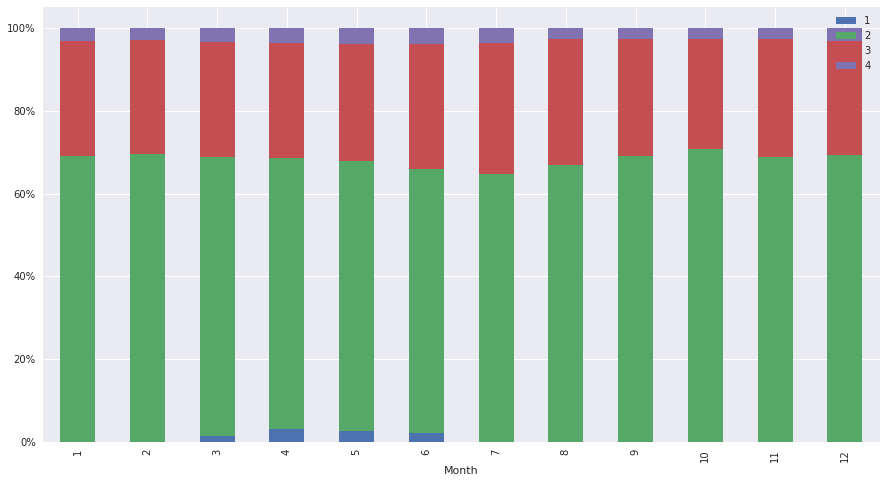

In [4]:
# Examining Severity by month, most severe accidents (3 and 4) happened in June and July
accident_clean.groupby(["Month","Severity"]).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True,figsize = (15,8))
plt.legend(loc = 'upper right')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

<AxesSubplot:xlabel='Distance(mi)'>

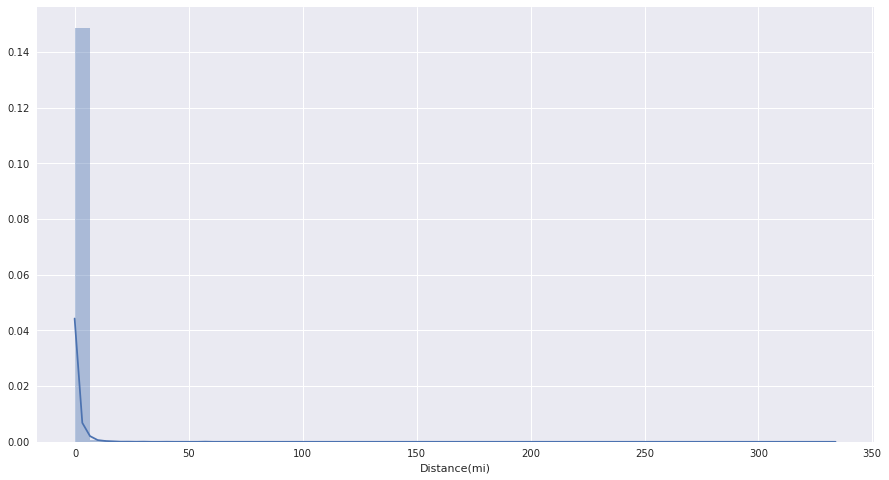

In [5]:
sns.distplot(accident_clean['Distance(mi)'])

In [6]:
accident_clean.groupby('Severity')['Distance(mi)'].mean()
# df[(df['year'] > 2012) & (df['reports'] < 30)]
# sns.boxplot(x="Severity", y="Wind_Speed(mph)", 
#             data=accident_clean[accident_clean["Wind_Speed(mph)"] <= 50], palette="Set1")

Severity
1    0.195360
2    0.161289
3    0.408350
4    1.719933
Name: Distance(mi), dtype: float64

In [7]:
accident_clean.groupby('Severity')['Time_Diff'].median()
# sns.boxplot(x="Severity", y="Time_Diff", data=accident_clean, palette="Set1")

Severity
1     34.0
2     44.0
3     42.0
4    274.0
Name: Time_Diff, dtype: float64

In [4]:
accident_road = accident[['Severity','Amenity', 'Bump','Crossing','Give_Way',
                         'Junction','No_Exit','Railway','Roundabout','Station',
                         'Stop','Traffic_Calming','Traffic_Signal','Turning_Loop']]
accident_road.head()

,Severity,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
0,3,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2,False,False,False,False,False,False,False,False,False,False,False,False,False
2,2,False,False,False,False,False,False,False,False,False,False,False,True,False
3,3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,2,False,False,False,False,False,False,False,False,False,False,False,True,False


In [ ]:
# More accidents are happening in the second half of the year
group_day = accident_clean.groupby(["Month","Day"]).size().unstack()
ax = sns.heatmap(group_day, cmap="YlGnBu",linewidths=0.1)

In [ ]:
# Most accidents happened between 7 and 8, which is the morning rush hour
# morning rush hour have much more accidents then the afternoon rush hour, which is 4 to 6 in the afternoon

group_hour = accident_clean.groupby(["Day","Hour"]).size().unstack()
ax = sns.heatmap(group_hour, cmap="YlGnBu",linewidths=0.1)

In [ ]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt

# A basic map
# m=Basemap(llcrnrlon=-160, llcrnrlat=-75,urcrnrlon=160,urcrnrlat=80)
m = Basemap(llcrnrlat=20,urcrnrlat=50,llcrnrlon=-130,urcrnrlon=-60)

# m = Basemap(projection='lcc', resolution='h', lat_0=37.5, lon_0=-119,
#             width=1E6, height=1.2E6,
#            llcrnrlat=20,urcrnrlat=50,llcrnrlon=-130,urcrnrlon=-60)

m.shadedrelief()
m.drawcoastlines(color='gray') 
m.drawcountries(color='gray') 
m.drawstates(color='gray')

lat = accident_clean.Start_Lat.tolist()
lon = accident_clean.Start_Lng.tolist()

x,y = m(lon,lat)
m.plot(x,y,'bo',alpha = 0.2)

In [ ]:
variable = ["Severity","Distance(mi)","Time_Diff","Temperature(F)","Wind_Chill(F)","Humidity(%)",
           "Pressure(in)","Visibility(mi)","Wind_Speed(mph)","Precipitation(in)"]
accident_model = accident_clean[variable]
accident_model = accident_model.dropna()
# accident_model['Severity'] = np.where(accident_model['Severity']<=2, 0, 1)
accident_model.head()

In [ ]:
Y = accident_model.loc[:,'Severity'].values
X = accident_model.loc[:,'Distance(mi)':'Precipitation(in)'].values

standardized_X = preprocessing.scale(X)
train_x, test_x, train_y, test_y = train_test_split(standardized_X,Y , test_size=0.3, random_state=0)

model = LogisticRegression(solver='lbfgs',multi_class='multinomial',max_iter=1000)
model.fit(train_x, train_y)

In [ ]:
model.score(test_x, test_y)

In [ ]:
model_y = model.predict(test_x)

mat = confusion_matrix(test_y,model_y)
sns.heatmap(mat, square=True, annot=True, cbar=False) 
plt.xlabel('predicted value')
plt.ylabel('true value')